In [1]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zeeha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Example text
sample_text = "I shot an elephant in my pajamas"

In [4]:
# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(sample_text))
tagged

[('I', 'PRP'),
 ('shot', 'VBP'),
 ('an', 'DT'),
 ('elephant', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('pajamas', 'NN')]

In [5]:
#Extract all parts of speech from any text
chunker = RegexpParser("""
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                       P: {<IN>}               #To extract Prepositions
                       V: {<V.*>}              #To extract Verbs
                       PP: {<P> <NP>}          #To extract Prepostional Phrases
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases
                       """)

In [6]:
# Print all parts of speech in above sentence
output = chunker.parse(tagged)

In [7]:
# To draw the parse tree
output.draw()

In [8]:
sent = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [9]:
sent_pos = nltk.word_tokenize(sent)
sent_pos = nltk.pos_tag(sent_pos)

In [10]:
sent_pos

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

### See all the pos tag list here
### https://www.guru99.com/pos-tagging-chunking-nltk.html

## SpaCy Library NER

In [11]:
#SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types:

In [12]:
# CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, NORP, ORDINAL, ORG, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, WORK_OF_ART

In [13]:
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm')
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [14]:
# IOB SCHEME
# I – Token is inside an entity.
# O – Token is outside an entity.
# B – Token is the beginning of an entity.

In [15]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'), (authorities, 'O', ''), (fined, 'O', ''), (Google, 'B', 'ORG'), (a, 'O', ''), (record, 'O', ''), ($, 'B', 'MONEY'), (5.1, 'I', 'MONEY'), (billion, 'I', 'MONEY'), (on, 'O', ''), (Wednesday, 'B', 'DATE'), (for, 'O', ''), (abusing, 'O', ''), (its, 'O', ''), (power, 'O', ''), (in, 'O', ''), (the, 'O', ''), (mobile, 'O', ''), (phone, 'O', ''), (market, 'O', ''), (and, 'O', ''), (ordered, 'O', ''), (the, 'O', ''), (company, 'O', ''), (to, 'O', ''), (alter, 'O', ''), (its, 'O', ''), (practices, 'O', '')]


In [16]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [17]:
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-columnregion&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

162

In [19]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 81,
         'GPE': 13,
         'ORG': 33,
         'CARDINAL': 6,
         'DATE': 20,
         'PRODUCT': 3,
         'NORP': 3,
         'ORDINAL': 1,
         'EVENT': 1,
         'FAC': 1})

In [20]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 32), ('F.B.I.', 17), ('Trump', 13)]

In [23]:
sentences = [x for x in article.sents]
print(sentences[10])

Mr. Trump’s victory traces back to June, when Mr. Strzok’s conduct was laid out in a wide-ranging inspector general’s report on how the F.B.I. handled the investigation of Hillary Clinton’s emails in the run-up to the 2016 election.


In [24]:
displacy.render(nlp(str(sentences[10])), jupyter=True, style='ent')

In [25]:
dict([(str(x), x.label_) for x in nlp(str(sentences[10])).ents])

{'Trump': 'PERSON',
 'June': 'DATE',
 'Strzok': 'PERSON',
 'F.B.I.': 'ORG',
 'Hillary Clinton’s': 'PERSON',
 '2016': 'DATE'}

#### Lemmatization

In [26]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[10])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Mr.', 'PROPN', 'Mr.'),
 ('Trump', 'PROPN', 'Trump'),
 ('victory', 'NOUN', 'victory'),
 ('traces', 'VERB', 'trace'),
 ('June', 'PROPN', 'June'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('conduct', 'NOUN', 'conduct'),
 ('laid', 'VERB', 'lay'),
 ('wide', 'ADV', 'wide'),
 ('ranging', 'VERB', 'range'),
 ('inspector', 'NOUN', 'inspector'),
 ('general', 'NOUN', 'general'),
 ('report', 'NOUN', 'report'),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('handled', 'VERB', 'handle'),
 ('investigation', 'NOUN', 'investigation'),
 ('Hillary', 'PROPN', 'Hillary'),
 ('Clinton', 'PROPN', 'Clinton'),
 ('emails', 'NOUN', 'email'),
 ('run', 'NOUN', 'run'),
 ('2016', 'NUM', '2016'),
 ('election', 'NOUN', 'election')]

In [27]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

### PDF Parser - You can use any pdf reader library

In [28]:
from tika import parser # pip install tika

raw = parser.from_file('1708.05148.pdf')
# print(raw['content'])

### Text Summarization

In [29]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [30]:
filtered_word_freq.most_common(20)

[('language', 66),
 ('Language', 54),
 ('text', 51),
 ('information', 44),
 ('Natural', 41),
 ('NLP', 38),
 ('data', 37),
 ('words', 31),
 ('Processing', 30),
 ('processing', 30),
 ('Proceedings', 29),
 ('used', 28),
 ('using', 26),
 ('model', 26),
 ('natural', 24),
 ('word', 24),
 ('Medical', 24),
 ('system', 23),
 ('systems', 23),
 ('Association', 23)]

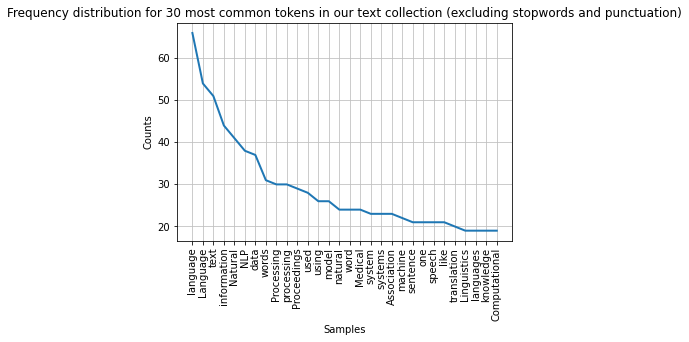

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [31]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

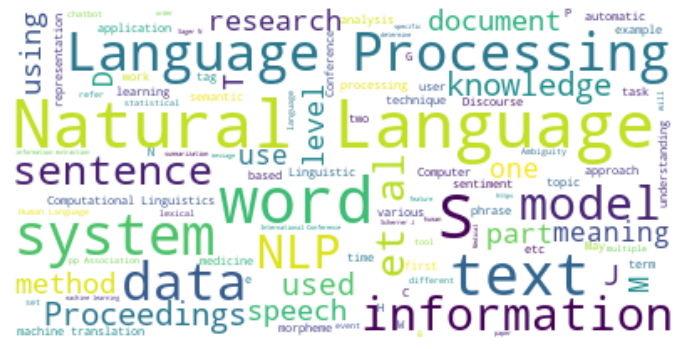

In [33]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

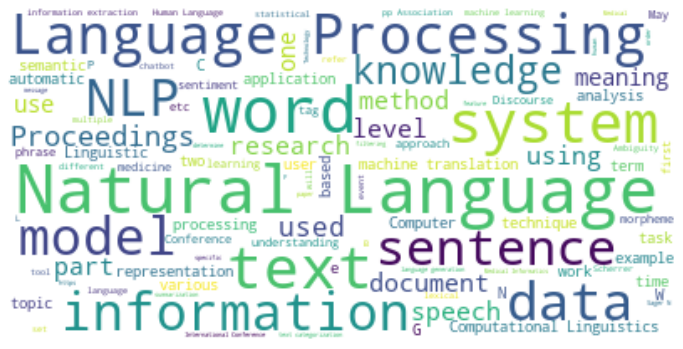

In [34]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### RAKE Library for Text Summarization (Topic Modeling)

In [35]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(78.88505776947558,
  'rennie ., 2000 )[ 46 ][ 47 ][ 48 ], memory based learning'),
 (65.21934709126491,
  'androutsopoulos et al ., 2000b )[ 47 ], support vector machines'),
 (61.88601375793157, 'druker et al ., 1999 )[ 49 ], decision trees'),
 (60.96969696969697, '79 ][ 80 ][ 81 ][ 82 ][ 83 ].'),
 (60.96969696969697, '74 ][ 75 ][ 76 ][ 77 ][ 78 ].'),
 (52.08839471031252, 'pradipta ranjan ray et al ., 2003 )[ 28'),
 (44.27348484848485,
  'gdpr (" general data protection regulation ") compliance'),
 (43.43030303030303,
  'wide ranging covering usual items like word segmentation'),
 (42.72380952380952, 'informatique et gestion des unités de soins'),
 (41.0257053291536, 'powerful general purpose sentence processors like sri ’')]

### SpaCy Library for Text Summarization (Topic Modeling)

In [36]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)

(Aditya Koli, Kiran Khatter, 1,2, Sukhdev Singh, 1,2, Department of Computer Science and Engineering 

Manav Rachna International University, Faridabad-121004, India, 2, Accendere Knowledge Management Services Pvt., India 

 

, NLP, four, NLP, Natural Language Generation, NLP, NLP, NLP, Artificial Intelligence and Linguistics, NLP, two, Natural 

Language Understanding, Natural Language Generation, 1, 1, Broad Classification, Linguistics, Syntax, Semantics, Noah Chomsky, one, first, twelfth century, Chomsky, 1965, two, Lower Level, NLP, Automatic Summarization, Machine Translation, Speech Tagging, Machine, one, NLP, Natural Language Processing, one, NLP, Rospocher, 2, English, Dutch, Italian, Natural 

Language Processing, NLP, NLP, Natural Language Processing, One, NLP, Natural Language Processing, 3, Shemtov 1997, Emele &, 1998, Knight & Langkilde 2000, 3][4][5, NLP, NLP, Content Planning, 2, 2, NLP, Natural Language Processing 

, 1, Linguistics, Ancient Greek, 1993, Nikolai Trubet

### Yake Library for Text Summarization (Topic Modeling)

In [37]:
## conda install -c conda-forge yake
import yake

In [40]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Natural Language Processing', 4.072522048481498e-05)
('Natural Language', 0.00017630910501789887)
('Language Processing', 0.0002772259012794197)
('Language', 0.0007182928677526841)
('Natural Language Generation', 0.0009267846454540823)
('Medical language processing', 0.0011647762261847519)
('NLP Natural Language', 0.001337310655145573)
('Natural', 0.001946179856619044)
('Medical Informatics Association', 0.0021316055807476812)
('Computational Linguistics', 0.0022099659030024995)
('Natural Language Understanding', 0.002233998933477433)
('Processing', 0.0022969736217534134)
('language processing techniques', 0.0023694804789331256)
('Natural language information', 0.002410833598791504)
('language information processing', 0.0026347016804727564)
('human language', 0.0027613201712648403)
('NLP', 0.0030647533731460543)
('language processing tools', 0.003157583088635903)
('MEDical Language', 0.003266335063269876)
('text', 0.003319539662316616)


# Sentiment Analysis

# Twitter Data

### Sign Up for developer account
#### https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api

In [41]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

In [42]:
s = TextBlob('CS 457 is the best course throughout my course work')
s.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [43]:
s = TextBlob('CS 457 is an okay course')
s.sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [44]:
s = TextBlob('CS 457 is the worst course I have ever taken')
s.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [ ]:
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''
auth = tw.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Create a custom search term and define the number of tweets
search_term = "#imrankhan -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-04-06').items(100)

In [ ]:
searched_tweets = [t for t in tweets]

In [ ]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_IK_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_IK_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_IK.csv',index=False)

In [ ]:
def remove_url(txt):
    #Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [ ]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])

In [ ]:
tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [ ]:
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_clean_IK.csv',index=False)

In [45]:
tweet_dataset = pd.read_csv('tweet_data_clean_IK.csv')

In [46]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0]>=0:
       res = 'positive'
    else:
       res= 'negative'
    return(res)

In [47]:
tweet_dataset['sentiment'] = np.vectorize(tweet_sentiment)(tweet_dataset['text'])

In [49]:
tweet_dataset.head(20)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
0,1511903264475918336,Pakistans apex court will resume hearing today...,0,0,Thu Apr 07 03:06:42 +0000 2022,positive
1,1511902714472636416,UTURN imrankhan PTI PAKARMY PakistanZindabad I...,0,0,Thu Apr 07 03:04:31 +0000 2022,positive
2,1511901761266761734,Remind me who selected ImranKhanPTI What a sha...,1,2,Thu Apr 07 03:00:44 +0000 2022,positive
3,1511900961127612416,Putin backing of ImranKhan was just a loser jo...,0,0,Thu Apr 07 02:57:33 +0000 2022,positive
4,1511900308653461508,Price of independent ForeignPolicy for a sover...,0,0,Thu Apr 07 02:54:57 +0000 2022,negative
5,1511899721035444224,jomalhotra to chaudhari Gov allegation ag Oppn...,0,0,Thu Apr 07 02:52:37 +0000 2022,negative
6,1511899017004920833,NoConfidenceMotion against ImrankhanPTI govt w...,0,0,Thu Apr 07 02:49:50 +0000 2022,negative
7,1511898617853972488,So they couldnt find anything against ImranKha...,0,0,Thu Apr 07 02:48:14 +0000 2022,positive
8,1511896989327400960,Im having bad feelings about todays Supreme Co...,0,0,Thu Apr 07 02:41:46 +0000 2022,negative
9,1511896772603432969,Happy Birthday Jhalam Ky Shehzady Or ImranKhan...,1,0,Thu Apr 07 02:40:54 +0000 2022,positive


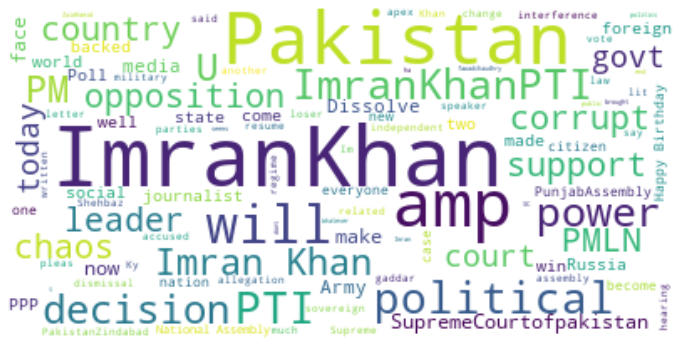

In [50]:
corpus = ' '.join(tweet_dataset.text)
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["T", "J", "D", "S", "M", "H", "et al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()